# Recognition of the fashion with Keras

In [1]:
# dataset of models
from tensorflow.keras.datasets import fashion_mnist
# модель нейронной сети с последовательным соединением нейронов
from tensorflow.keras.models import Sequential
# подключаем полносвязную нейронную сеть (dense)
from tensorflow.keras.layers import Dense
# утилиты для keras
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
# отрисовка изображений
import matplotlib.pyplot as plt

from google.colab import files
import numpy as np
from PIL import Image

## Подготовка данных для обучения сети

In [3]:
# Загрузка данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
# классификация выходных данных
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

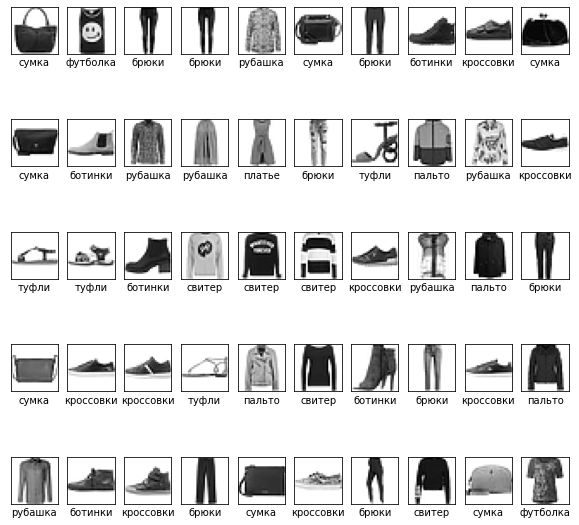

In [6]:
# примеры изображений
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

 ### Преобразование размерности изображения (из картинки в плоскую последовательность "плоский вектор")

In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

### Нормализуем данные: делим на 255 градаций серового. Таким образом данные будут в диапазоне от нуля до 1

In [9]:
x_train = x_train / 255
x_test = x_test / 255

## Работа с правильными ответами

Просматриваем пример правильного ответа

In [10]:
print(y_train[0])


9


### Преобразуем метки в формат one hot encoding

In [11]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

### Правильный ответ в формате one hot encoding

In [12]:
print(y_train[0])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создаем нейронную сеть

Архитектура нейронной сети

In [13]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

Компиляция сети

In [17]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучение сети

In [15]:
history = model.fit(x_train, y_train,
                    batch_size=200,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
300/300 [==============================] - 11s 36ms/step - loss: 1.1367 - accuracy: 0.6674

## Сохраняем нейронную сеть для последующего использования

In [ ]:
model.save('fashion_mnist_dense.h5')

## Оценка качества обучения
### Проверка качества работы на наборе данных для тестирования

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

## Используем сеть для распознавания моделей одежды

In [18]:
# Запускаем распознавание набора данных, на котором обучалась сеть
predictions = model.predict(x_train)


### Проверяем качество распознавания

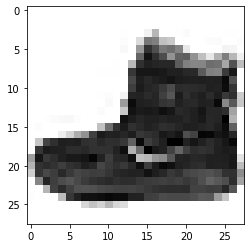

In [19]:
# Просматриваем пример изображения
n = 0
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()


### Данные на выходе из сети в формате one-hot-encoding

In [20]:
print(predictions[n])


[5.8853669e-07 1.1075268e-06 1.6521982e-06 6.6471102e-07 2.8884335e-06
 7.1296194e-03 3.0478798e-06 8.6328806e-03 1.2549441e-03 9.8297262e-01]


### Определяем номер класса изображения, который предлагает сеть

In [21]:
np.argmax(predictions[n])


9

### Печатаем название класса

In [22]:
classes[np.argmax(predictions[n])]


'ботинки'

### Печатаем номер класса правильного ответа

In [23]:
np.argmax(y_train[n])


9

### Печатаем название класса правильного ответа

In [24]:
classes[np.argmax(y_train[n])]


'ботинки'

In [ ]:
n_rec = 496
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
# Меняем размерность изображения и нормализуем его
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

# Запускаем распознавание
prediction = model.predict(x)

# Печатаем результаты распознавания
prediction

# Преобразуем результаты из формата one hot encoding
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

# Печатаем правильный ответ
label = np.argmax(y_test[0])
print("Номер класса:", label)
print("Название класса:", classes[label])



Загружаем свою картинку

In [ ]:
files.upload()

In [ ]:
# Проверяем загрузку картинки
!ls

In [ ]:
# Загружаем картинку из файла
img_path = 'tshirt.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

In [ ]:
# Показываем картинку

plt.imshow(img.convert('RGBA'))
plt.show()

In [ ]:
# Преобразуем картинку для обработки нейронной сетью

# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x = x / 255

In [ ]:
# Запускаем распознавание
prediction = model.predict(x)

# Результаты распознавания
prediction

prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])